### Examples for Lec 5-7

1\. The UDP segment structure is shown below, as defined in RFC 768. 

                                     0      7 8     15 16    23 24    31 (bit)
                                     +--------+--------+--------+--------+
                                     |     Source      |   Destination   |
                                     |      Port       |      Port       |
                                     +--------+--------+--------+--------+
                                     |                 |                 |
                                     |     Length      |    Checksum     |
                                     +--------+--------+--------+--------+
                                     |
                                     |          data octets ...
                                     +---------------- ...

                                          User Datagram Header Format

The UDP checksum provides for error detection. That is, the checksum is used to determine whether bits within the UDP segment have been altered (for example, by noise in the links or while stored in a router) as it moved from source to destination. Checksum is the 16-bit one's complement of the one's complement sum of a pseudo header of information from the IP header, the UDP header, and the data,  padded  with zero octets  at the end (if  necessary)  to  make  a multiple of two octets. The pseudo  header conceptually prefixed to the UDP header contains the source  address,  the destination  address,  the protocol (0x0011), and the UDP length. Given the following information, please filling the missing part. 

Solution:

Source IP: 172.217.1.35

Destination IP: 100.64.15.162

                                     +--------+--------+--------+--------+
                                     |      01 bb      |      f7 60      |
                                     +--------+--------+--------+--------+
                                     |      00 1a      |    Checksum     |
                                     +--------+--------+--------+--------+
                                     | 40 03 6e 95 ec 57 b4 a6 bb ff ad  |
                                     | 84 b1 6d 06 7e 55 35              |
                                     +-----------------------------------+ 



<!--\n
    Source: RFC 768
-->


Solution:
First, we transform IP into HEX form. 

172.217.1.35 --> ac d9 01 23

100.64.15.162 --> 64 40 0f a2

Next, we add up the pseudo header, i.e., Source IP + Destination IP + 0x0011 (protocol code) + UDP Packet Length + Source Port + Destination Port + UDP Packet Length + Data.
That is,  ac d9 + 01 23 + 64 40 + 0f a2 + 00 11 + 00 1a + 01 bb + f7 60 + 00 1a + 40 03 + 6e 95 + ec 57 + b4 a6 + bb ff + ad 84 + b1 6d + 06 7e + 55 35 = 6 E1 76. Transformed into binary bits, we get 0x6E176 = 0110 1110 0001 0111 0110. Roll over extra bits, we got 1110 0001 0111 0110 + 0110 = 1110 0001 0111 1100. Finally, we take one's complement to be 0001 1110 1000 0011‬ = 0x1e 83.
  

2\. Consider the OOK NRZ signal shown as follows:

$$a(t) = \sum_{n} A_n\ \mathrm{rect}\left( \frac{t-nT}{T} \right),$$

where $A_n = 0 , n\neq 1, A_1 = 1$ and bit rate $R = \frac{1}{T} = 10^3\,\rm{bits/s}$. Specify its frequency response and plot its magnitude response. 

<!--\n
    Source: Xinyun Wang
-->

Solution: 

\begin{align}
T & = \frac{1}{R} \\
& = \frac{1}{10^3} \,\rm{s}\\
A(f) & = e^{j2\pi f T} T \rm{sinc}(fT)\\
\left \vert A(f) \right \vert & = T \rm{sinc}(fT)
\end{align}

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pylab as plt 
from scipy import fftpack

In [2]:
R = 1e3
f0 = R
T = 1/R
fs = 1e4
Ts = 1/fs
N = int(1e5)

n = np.arange(N,dtype=int)
t = n/fs

a = np.zeros( (N,) ) 
a[0*int(T/Ts):1*int(T/Ts)] = 1.0

af = fftpack.fftshift(fftpack.fft(a))
freq = np.linspace(-1/2, 1/2, num = N)*fs

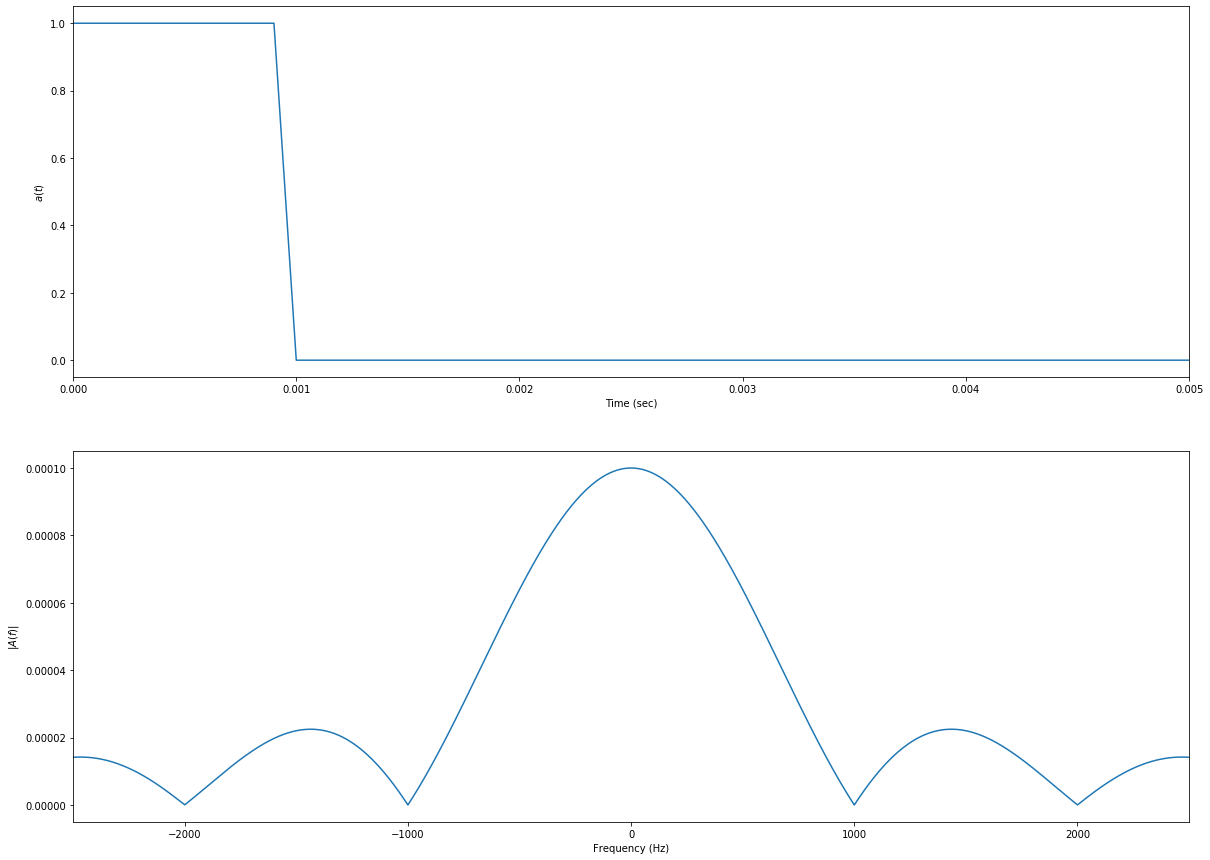

In [3]:
f = plt.figure()
f.set_figheight(15)
f.set_figwidth(20)

plt.subplot(211)
plt.plot(t, a)
plt.xlabel("Time (sec)")
plt.ylabel("$a(t)$")
plt.xlim(0,5/f0)
    
    

plt.subplot(212)
plt.plot(freq,abs(af)/N,'-')
plt.ylabel("$|A(f)|$")
plt.xlabel("Frequency (Hz)")
plt.xlim(-2.5*f0,2.5*f0)

plt.show()

3\. Show that the probability of undetected error of a single-bit parity check code is 
$$\mathbb{P}(\text{undetected error}) = \frac{1 + (1-2p)^{k+1} - 2(1-p)^{k+1}}{2},$$
where $k$ is the number of information bits and $p$ is the probability of one bit error. Assume that each bit error is independent. 


Solution:

Single-parity check code is able to detect odd-bits error and is not able to detect even-bits error. 
Therefore, the probability of odd-bits error and even-bits error given by:
\begin{align}
\mathbb{P}(\text{odd-bits error}) & = \sum_{i = 0}^{\left[\frac{k+1}{2}\right]} \binom{k+1}{2i+1} \left(1-p\right)^{k - 2i} p^{2i+1}\\
\mathbb{P}(\text{even-bits error}) & = \sum_{i = 1}^{\left[\frac{k+1}{2}\right]} \binom{k+1}{2i}  \left(1-p\right)^{k+1 - 2i} p^{2i}
\end{align}

By
\begin{align}
(1-p - p)^{k+1} & = \sum_{j = 0}^{k+1} \binom{k+1}{j} \left(1-p\right)^{k+1 - j} (-p)^{j}\\
(1-p + p)^{k+1} & = \sum_{j = 0}^{k+1} \binom{k+1}{j} \left(1-p\right)^{k+1 - j} p^{j}
\end{align}
we obtain:
\begin{align}
\frac{(1-p - p)^{k+1} + 1}{2}  & = \sum_{i = 0}^{\left[\frac{k+1}{2}\right]} \binom{k+1}{2i}  (1-p)^{k+1 - 2i} p^{2i}
\end{align}
 
 Therefore,
 \begin{align} 
\mathbb{P}(\text{even-bits error}) & = \sum_{i = 1}^{\left[\frac{k+1}{2}\right]} \binom{k+1}{2i}  (1-p)^{k+1 - 2i} p^{2i}\\
& = \sum_{i = 0}^{\left[\frac{k+1}{2}\right]}\binom{k+1}{2i}  (1-p)^{k+1 - 2i} p^{2i} - (1-p)^{k+1}\\
& = \frac{1 + (1-2p)^{k+1} - 2(1-p)^{k+1}}{2}
\end{align}

4\. Using the CRC polynomial 1011, compute the CRC code word for the information word 1100011. Check the division performed at the receiver. 




<!--\n
    Source 1: Essentials Of Computer Organization And Architecture, 4th Edition
    Source 2: https://en.wikipedia.org/wiki/Cyclic_redundancy_check
-->


Solution: 

First, recall that a 4-bit CRC polynomial will generate a 3-bit CRC, we need to add $(4-1) = 3\,\rm{bits}$ zeros at the end of the information word, i.e., from "1100011" to "1100011000".
Then, we divide the information word padded by three zeros by polynomial "1011" using modulus 2. 

                    1100011000    <---- information word padded by three zeros
                    1011          <---- divisor
                    -------------
                    0111011000    <---- result
                     1011
                    -------------
                    0010111000
                      1011
                    -------------
                    0000001000    <---- note that the divisor moves over to align with the next 1 in the dividend 
                          1011 
                    -------------
                    0000000011    <---- remainder (3 bits)
                    
Next, we obtain the complete 10-bit CRC code word as 1100011000 + 011 = 1100011011.
Finally, we check the devision performed at the RX side.

                    1100011011     
                    1011          
                    -------------
                    0111011011     
                     1011
                    -------------
                    0010111011
                      1011
                    -------------
                    0000001011     
                          1011 
                    -------------
                    0000000000     
